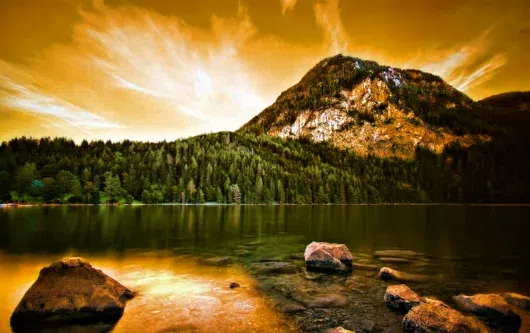

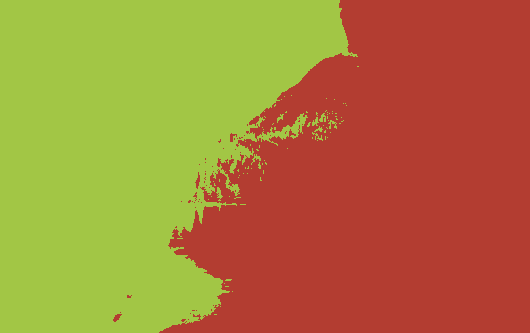

In [2]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/Screenshot-2024-06-11-150857.webp'
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert image to L*a*b* color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

    # Flatten the image
    flat_image = lab_image.reshape((-1, 3))

    # Create the feature space [L, a, b, x, y]
    height, width, _ = image.shape
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    flat_image_with_coordinates = np.column_stack([flat_image, x.flatten(), y.flatten()])

    # Estimate bandwidth for Mean Shift
    bandwidth = estimate_bandwidth(flat_image_with_coordinates, quantile=0.2, n_samples=500)

    # Perform Mean Shift clustering
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    mean_shift.fit(flat_image_with_coordinates)
    labels = mean_shift.labels_

    # Reshape the labels to the original image shape
    segmented_image = labels.reshape((height, width))

    # Generate a colored segmented image
    unique_labels = np.unique(labels)
    segmented_colors = np.random.randint(0, 255, size=(len(unique_labels), 3))
    colored_segmented_image = segmented_colors[segmented_image]

    # Display the result using cv2_imshow
    cv2_imshow(image)
    cv2_imshow(colored_segmented_image)
